In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
wine = pd.read_csv('https://bit.ly/wine_csv_data')
data = wine[['alcohol','sugar','pH']].to_numpy()
target = wine['class'].to_numpy()
train_input, test_input, train_target, test_target = train_test_split(
    data, target, test_size = 0.2, random_state = 42)

In [4]:
wine

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0
...,...,...,...,...
6492,11.2,1.6,3.27,1.0
6493,9.6,8.0,3.15,1.0
6494,9.4,1.2,2.99,1.0
6495,12.8,1.1,3.34,1.0


In [5]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [9]:
wine['class'].unique()

array([0., 1.])

Text(0, 0.5, 'Frequency')

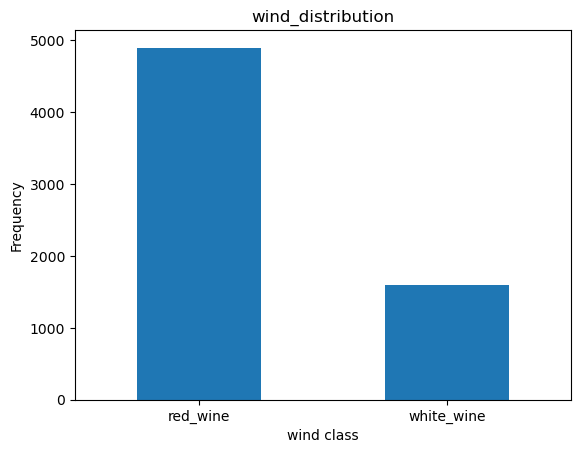

In [10]:
LABELS = ['red_wine', 'white_wine']
import matplotlib.pyplot as plt

count_classes = pd.value_counts(wine['class'], sort = True)
count_classes.plot(kind = 'bar', rot = 0)
plt.title('wind_distribution')
plt.xticks(range(2), LABELS)
plt.xlabel('wind class')
plt.ylabel('Frequency')

In [2]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_jobs = -1, random_state = 42)

In [5]:
scores = cross_validate(rf, train_input, train_target, 
                        return_train_score = True, n_jobs = -1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9973541965122431 0.8905151032797809


In [6]:
rf.fit(train_input, train_target)
print(rf.feature_importances_)

[0.23167441 0.50039841 0.26792718]


In [7]:
rf = RandomForestClassifier(oob_score = True, n_jobs = -1, random_state = 42)
rf.fit(train_input, train_target)
print(rf.oob_score_)

0.8934000384837406


In [8]:
from sklearn.ensemble import ExtraTreesClassifier
et = ExtraTreesClassifier(n_jobs = -1, random_state = 42)
scores = cross_validate(et, train_input, train_target,
                        return_train_score = True, n_jobs = -1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9974503966084433 0.8887848893166506


In [10]:
et.fit(train_input, train_target)
print(et.feature_importances_)

[0.20183568 0.52242907 0.27573525]


In [12]:
from sklearn.ensemble import GradientBoostingClassifier
gd = GradientBoostingClassifier(random_state = 42)
scores = cross_validate(gd, train_input, train_target, 
                        return_train_score = True, n_jobs = -1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.8881086892152563 0.8720430147331015


In [16]:
gb = GradientBoostingClassifier(n_estimators = 500, learning_rate = 0.2, 
                                random_state = 42)
scores = cross_validate(gd, train_input, train_target,
                       return_train_score = True, n_jobs = -1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9464595437171814 0.8780082549788999


In [17]:
gb.fit(train_input, train_target)
print(gb.feature_importances_)

[0.15872278 0.68011572 0.16116151]


In [19]:
from sklearn.ensemble import HistGradientBoostingClassifier
hgb = HistGradientBoostingClassifier(random_state=42)
scores = cross_validate(hgb, train_input, train_target, return_train_score = True)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9321723946453317 0.8801241948619236


In [20]:
from sklearn.inspection import permutation_importance
hgb.fit(train_input, train_target)
result = permutation_importance(hgb, train_input, train_target,
                               n_repeats = 10, random_state = 42, n_jobs = -1)
print(result.importances_mean)

[0.08876275 0.23438522 0.08027708]


In [21]:
result = permutation_importance(hgb, test_input, test_target,
                               n_repeats = 10, random_state = 42, n_jobs = -1)
print(result.importances_mean)

[0.05969231 0.20238462 0.049     ]


In [22]:
hgb.score(test_input, test_target)

0.8723076923076923

In [28]:
pip install xgboost

     --------------------------------------- 89.1/89.1 MB 13.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [29]:
from xgboost import XGBClassifier
xgb = XGBClassifier(tree_method = 'hist', random_state = 42)
scores = cross_validate(xgb, train_input, train_target,
                        return_train_score=True)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9555033709953124 0.8799326275264677


In [31]:
pip install lightgbm

     ---------------------------------------- 1.0/1.0 MB 13.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [32]:
from lightgbm import LGBMClassifier
lgb = LGBMClassifier(random_state = 42)
scores = cross_validate(lgb, train_input, train_target, 
                       return_train_score = True, n_jobs = -1)

In [33]:
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.935828414851749 0.8801251203079884
